<a href="https://colab.research.google.com/github/Chicken2322/Covid_Italy/blob/master/Covid_Italy_CTScan_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import  VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [3]:

!unzip '/content/drive/MyDrive/Covid_Italy_CTSCAN_25/Copy of keras-covid-19.zip'

Archive:  /content/drive/MyDrive/Covid_Italy_CTSCAN_25/Copy of keras-covid-19.zip
   creating: keras-covid-19/
  inflating: keras-covid-19/build_covid_dataset.py  
  inflating: keras-covid-19/covid19.model  
   creating: keras-covid-19/dataset/
   creating: keras-covid-19/dataset/covid/
  inflating: keras-covid-19/dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: keras-covid-19/dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: keras-covid-19/dataset/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: keras-covid-19/dataset/covid/auntminnie-c-2020_01_28_23_

In [4]:
dataset = r'/content/keras-covid-19/dataset'

In [5]:
INIT_LR = 1e-3
EPOCHS=10
BS=3

In [6]:
args={}
args['dataset']=dataset

In [7]:
dataset

'/content/keras-covid-19/dataset'

In [8]:
import numpy as np
from imutils import paths
import cv2
import os

iPaths = list(paths.list_images(args["dataset"]))
data=[]
labels=[]
print(iPaths)

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
  

['/content/keras-covid-19/dataset/normal/IM-0033-0001-0001.jpeg', '/content/keras-covid-19/dataset/normal/person651_bacteria_2543.jpeg', '/content/keras-covid-19/dataset/normal/person438_bacteria_1893.jpeg', '/content/keras-covid-19/dataset/normal/person1935_bacteria_4849.jpeg', '/content/keras-covid-19/dataset/normal/IM-0240-0001.jpeg', '/content/keras-covid-19/dataset/normal/NORMAL2-IM-0315-0001.jpeg', '/content/keras-covid-19/dataset/normal/person259_bacteria_1220.jpeg', '/content/keras-covid-19/dataset/normal/person525_bacteria_2216.jpeg', '/content/keras-covid-19/dataset/normal/person989_virus_1667.jpeg', '/content/keras-covid-19/dataset/normal/person1830_bacteria_4693.jpeg', '/content/keras-covid-19/dataset/normal/person1290_virus_2215.jpeg', '/content/keras-covid-19/dataset/normal/person612_bacteria_2478.jpeg', '/content/keras-covid-19/dataset/normal/person925_virus_1582.jpeg', '/content/keras-covid-19/dataset/normal/person1558_bacteria_4066.jpeg', '/content/keras-covid-19/datas

In [9]:
data = np.array(data)/255.0
labels=np.array(labels)

In [10]:
labels

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid',
       'covid', 'covid', 'covid', 'covid', 'covid'], dtype='<U6')

In [11]:
import os
Data_Dir = "Data//"

In [13]:
Cimages = os.listdir(dataset+"//covid")
Nimages = os.listdir(dataset+"//normal")

In [21]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage import transform

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


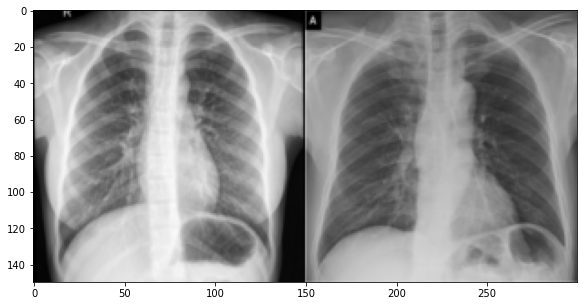

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


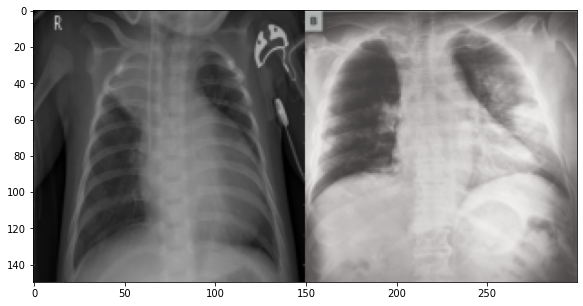

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


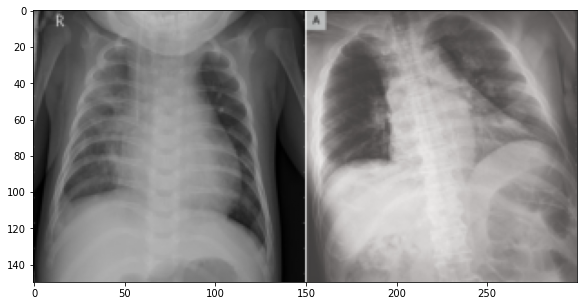

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


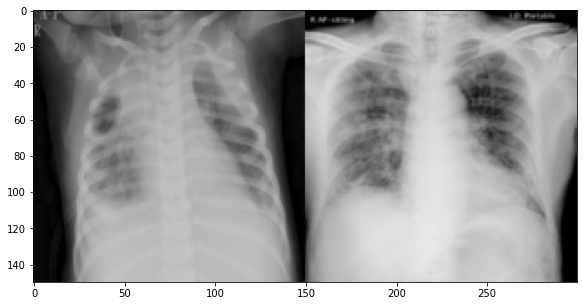

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


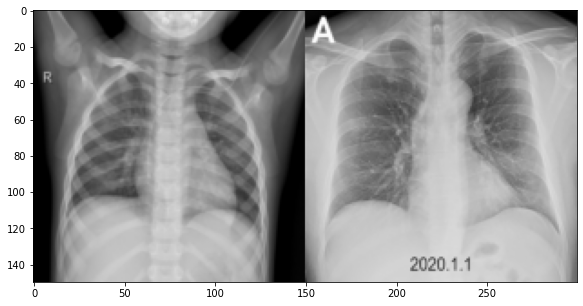

In [22]:
def plotter(i):
    normal = cv2.imread(dataset+"//normal//"+Nimages[i])
    normal = transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"//covid//"+Cimages[i])
    coronavirus = transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray     Vs      Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [23]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [25]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


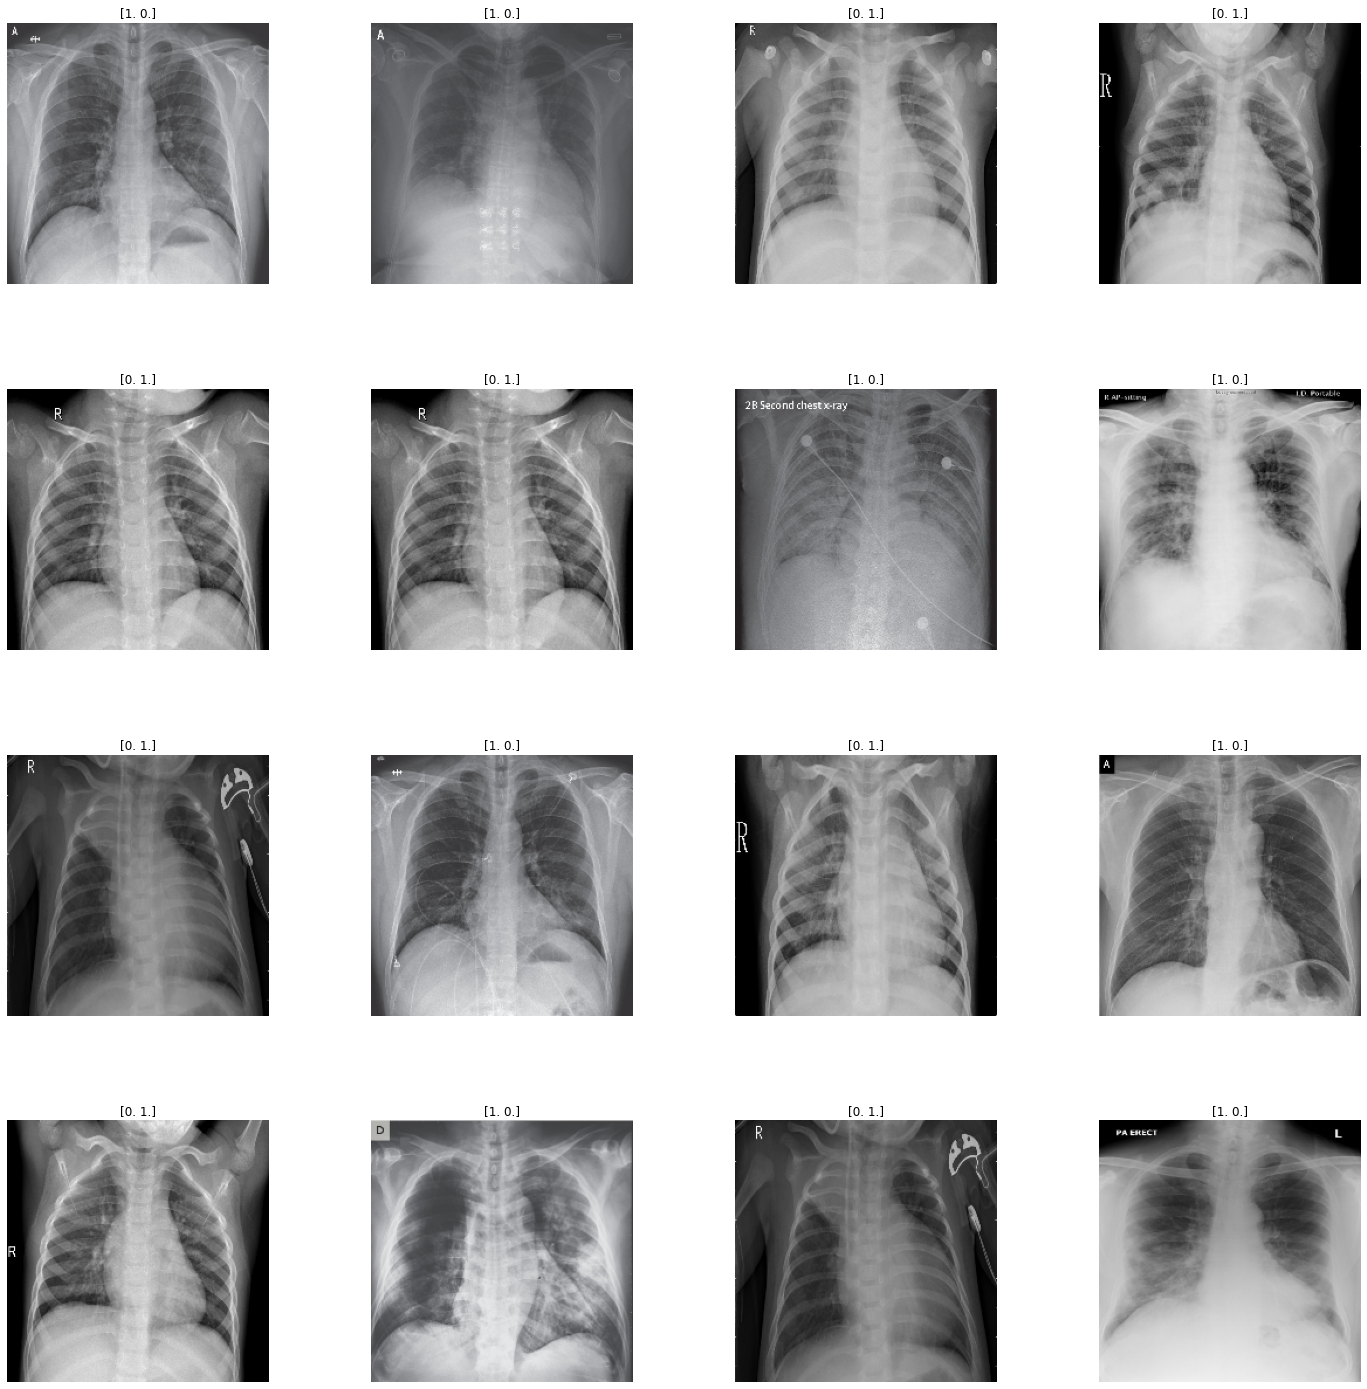

In [26]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [27]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
13/13 [==============================] - 23s 2s/step - loss: 1.0680 - accuracy: 0.4054 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 23s 2s/step - loss: 0.6857 - accuracy: 0.5676 - val_loss: 0.7013 - val_accuracy: 0.4000
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 0.5884 - accuracy: 0.6486 - val_loss: 0.6965 - val_accuracy: 0.6000
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 0.6133 - accuracy: 0.6486 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 0.6380 - accuracy: 0.6486 - val_loss: 0.6885 - val_accuracy: 0.4000
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 0.5158 - accuracy: 0.7838 - val_loss: 0.6565 - val_accuracy: 0.7000
Epoch 7/10
13/13 [==============================] - 24s 2s/step - l

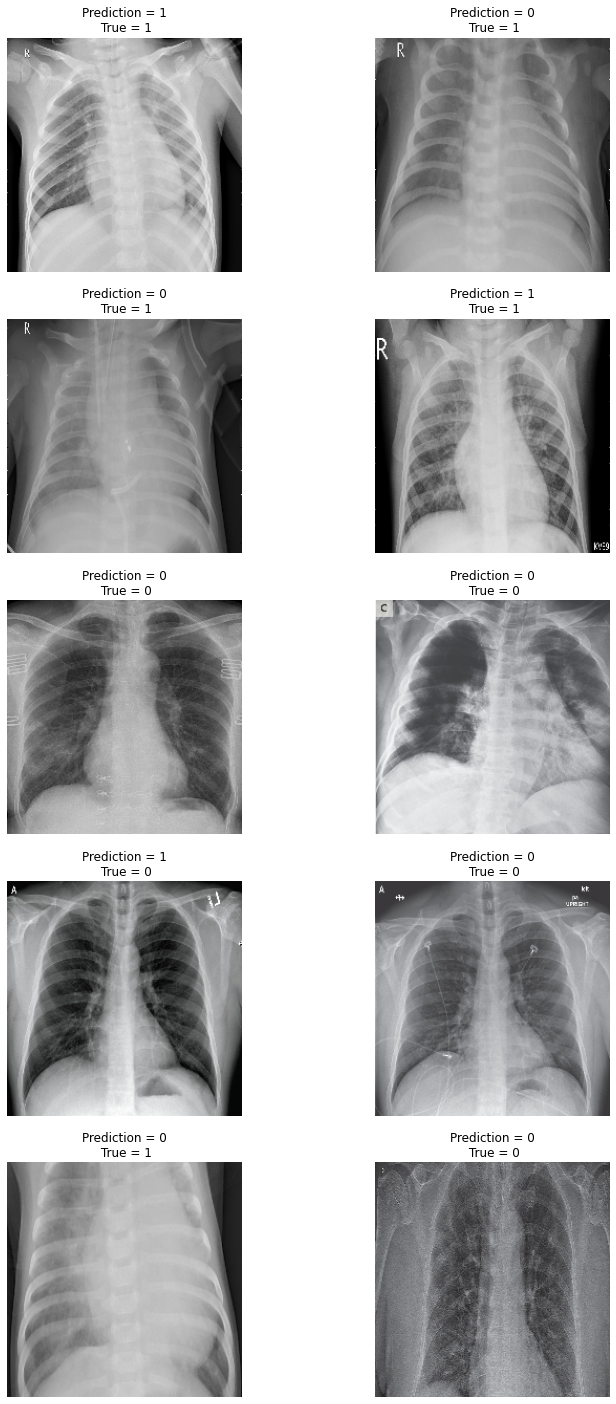

In [72]:
L = 5
W = 2
fig, axes = plt.subplots(L,W, figsize = (25,25))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.2,hspace=0.2,right = 0.5)

In [73]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       covid       0.57      0.80      0.67         5
      normal       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[4 1]
 [3 2]]
acc: 0.6000
sensitivity: 0.8000
specificity: 0.4000


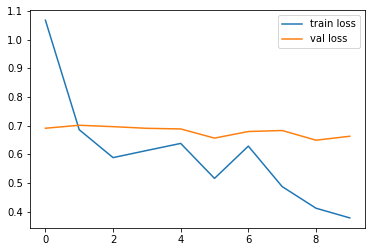

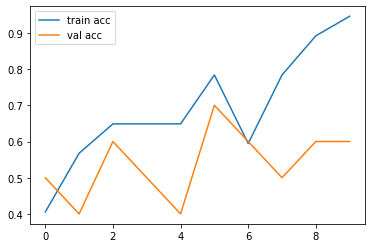

<Figure size 432x288 with 0 Axes>

In [75]:
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Validation_loss')
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Validation_accuracy')

In [79]:
import tensorflow as tf
from keras.models import load_model
model.save('Covid_model_CTSCAN_25.h5')